### Juan Pablo Fonseca Correa - 138263

In [9]:
# importar librerías y leer la base de datos
import pandas as pd
import numpy as np
from scipy import sparse
from sys import maxint
from math import pow
from math import fabs
from __future__ import division
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from random import uniform
df = pd.read_csv('EjercicioROC.csv') # leo la bd

In [2]:
df = df.iloc[0:10116,:2] # esto es lo único que me interesa de la tabla

In [3]:
th = np.linspace(0,1,201)
tpr = []
fpr = []
max_precision = 0
max_accuracy = 0
th_max_accuracy = 0
th_max_precision = 0
for i in th:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(df)):
        if(df.iloc[j,0]>=i):
            if(df.iloc[j,1]==1):
                tp = tp + 1
            else:
                fp = fp + 1
        else:
            if(df.iloc[j,1]==1):
                fn = fn + 1
            else:
                tn = tn + 1
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))
    if tp+fp > 0:
        precision = tp/(tp+fp)
        if precision > max_precision:
            max_precision = precision
            th_max_precision = i
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        th_max_accuracy = i


In [4]:
print "Threshold de máxima precision: {0}".format(th_max_precision)
print "Threshold de máximo accuracy: {0}".format(th_max_accuracy)

Threshold de máxima precision: 0.235
Threshold de máximo accuracy: 0.435


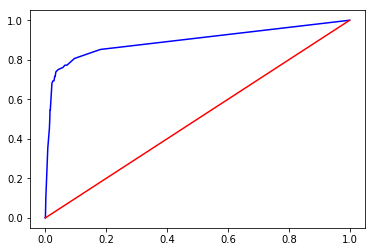

Curva ROC


In [5]:
plt.plot(fpr,tpr,color="blue") # curva ROC
plt.plot(fpr,fpr,color="red") # diagonal
# plt.scatter(fpr[np.where(th == th_max_precision)[0][0]],tpr[np.where(th == th_max_precision)[0][0]],color = "orange")
# plt.scatter(fpr[np.where(th == th_max_accuracy)[0][0]],tpr[np.where(th == th_max_accuracy)[0][0]],color = "green")
plt.show()
print "Curva ROC"
# print "Naranja: punto de máxima precision. Verde: punto de máximo accuracy."

### Ahora, se hará con el paquete de sklearn:

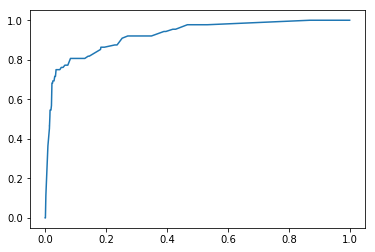

El área bajo la curva es 0.925404322443


In [10]:
true_labels = df.iloc[0:10116,1]
scores = df.iloc[0:10116,0]
fp_rate, tp_rate, thres = roc_curve(true_labels,scores)
plt.plot(fp_rate,tp_rate)
plt.show()
area = roc_auc_score(true_labels,scores)
print "El área bajo la curva es {0}".format(area)